   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 21.2 MB/s eta 0:00:00
UPDATED TIP OUTPUT: 13.779356954063367
UPDATED BRAKE OUTPUT: 39.07636898979889


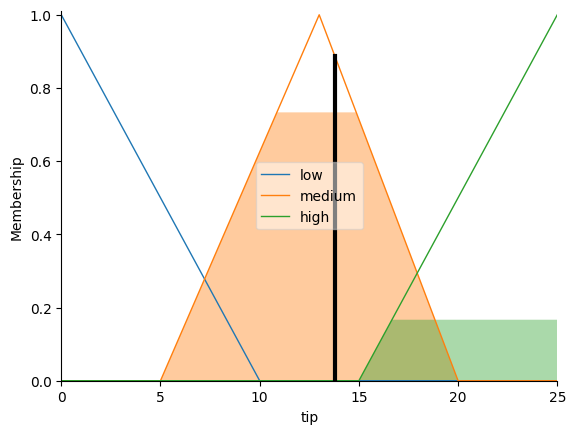

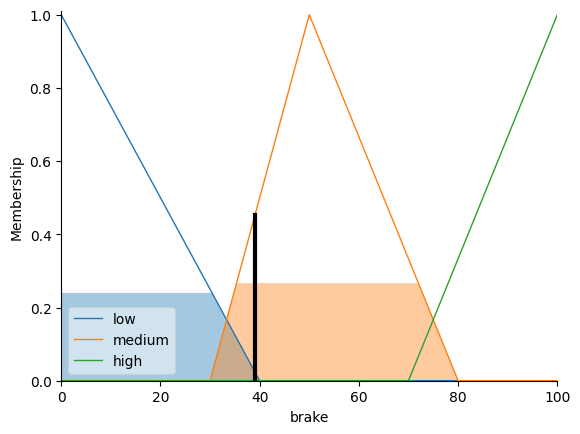

In [4]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -----------------------------
# RESTAURANT TIPPING SYSTEM
# -----------------------------
def restaurant_tipping():
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

    # UPDATED MEMBERSHIP FUNCTIONS
    service['poor'] = fuzz.trimf(service.universe, [0, 0, 4])
    service['average'] = fuzz.trimf(service.universe, [2, 5, 8])
    service['good'] = fuzz.trimf(service.universe, [6, 10, 10])

    food['poor'] = fuzz.trimf(food.universe, [0, 0, 4])
    food['average'] = fuzz.trimf(food.universe, [3, 5, 8])
    food['good'] = fuzz.trimf(food.universe, [7, 10, 10])

    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 10])
    tip['medium'] = fuzz.trimf(tip.universe, [5, 13, 20])
    tip['high'] = fuzz.trimf(tip.universe, [15, 25, 25])

    # Rules stay same
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    tipping.input['service'] = 4.2     # UPDATED INPUT
    tipping.input['food'] = 7.5        # UPDATED INPUT

    tipping.compute()

    print("UPDATED TIP OUTPUT:", tipping.output['tip'])
    tip.view(sim=tipping)

# -----------------------------
# ABS BRAKING SYSTEM (UPDATED)
# -----------------------------
def abs_brake_system():
    speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 11, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

    # Updated membership functions
    speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])
    speed['medium'] = fuzz.trimf(speed.universe, [30, 60, 90])
    speed['high'] = fuzz.trimf(speed.universe, [70, 120, 120])

    slip['low'] = fuzz.trimf(slip.universe, [0, 0, 3])
    slip['medium'] = fuzz.trimf(slip.universe, [2, 5, 8])
    slip['high'] = fuzz.trimf(slip.universe, [6, 10, 10])

    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 40])
    brake['medium'] = fuzz.trimf(brake.universe, [30, 50, 80])
    brake['high'] = fuzz.trimf(brake.universe, [70, 100, 100])

    # Rules (same logic)
    rule1 = ctrl.Rule(speed['low'] | slip['low'], brake['high'])
    rule2 = ctrl.Rule(speed['medium'], brake['medium'])
    rule3 = ctrl.Rule(speed['high'] | slip['high'], brake['low'])

    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    braking.input['speed'] = 82      # UPDATED INPUT
    braking.input['slip'] = 6        # UPDATED INPUT

    braking.compute()

    print("UPDATED BRAKE OUTPUT:", braking.output['brake'])
    brake.view(sim=braking)

# Run both
restaurant_tipping()
abs_brake_system()

plt.show()